Check multitasking model performance- predict caste, predict gender, predict marks in total(range in 10 point scale) (AIEEE data)
1. Caste and Marks from AIEEE data
2. Gender also from AIEEE data

In [ ]:
AIEEE_2009_CSV = "../DataSets/AIEEEData/aieee_2009.csv"
AIEEE_2010_CSV = "../DataSets/AIEEEData/aieee_2010.csv"
AIEEE_2011_CSV = "../DataSets/AIEEEData/aieee_2011.csv"

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import sys  
sys.path.insert(0, '../PreProcessing/')

from preprocess_aieee import *
from char_utils import *

In [ ]:
ai10 = pd.read_csv(AIEEE_2010_CSV)
ai11 = pd.read_csv(AIEEE_2011_CSV)
ai09 = pd.read_csv(AIEEE_2009_CSV)
ai10 = preprocess_aieee(ai10)
ai11 = preprocess_aieee(ai11)
ai09 = preprocess_aieee(ai09)

marks in 10 point scale

In [ ]:
marks_10 = getMarks(ai10,'p1_marks',MAX_2010)
marks_11 = getMarks(ai11, 'p1_marks',MAX_2011)
marks_09 = getMarks(ai09, 'p1_marks', MAX_2009)

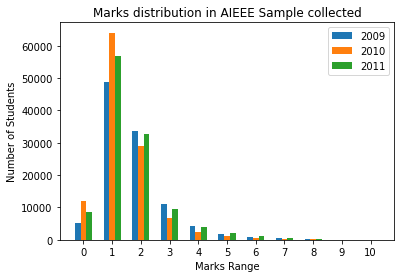

In [ ]:
# If you can plot the count based on buckets
ranges = [-10,0,1,2,3,4,5,6,7,8,9,10]
l1 = marks_09.groupby(pd.cut(marks_09.Marks, ranges)).count()
l2 = marks_10.groupby(pd.cut(marks_10.Marks, ranges)).count()
l3 = marks_11.groupby(pd.cut(marks_11.Marks, ranges)).count()

X_axis = np.arange(len(ranges[1:]))

plt.bar(X_axis - 0.2, list(l1.Name),0.2 , label = '2009')
plt.bar(X_axis + 0, list(l2.Name),0.2 ,label = '2010')
plt.bar(X_axis + 0.2, list(l3.Name),0.2 ,label = '2011')

plt.xticks(X_axis, ranges[1:])
plt.xlabel("Marks Range")
plt.ylabel("Number of Students")
plt.title("Marks distribution in AIEEE Sample collected")
plt.legend()
plt.show()

In [ ]:
print(marks_09.shape)
print(marks_10.shape)
print(marks_11.shape)

(106592, 2)
(116290, 2)
(115516, 2)


Convert Names to embedding

Get Gender labels

In [ ]:
gender_10 = getGenderNames(ai10)
gender_11 = getGenderNames(ai11)
gender_09 = getGenderNames(ai09)

In [ ]:
print(gender_09.groupby('Gender').count())
print(gender_10.groupby('Gender').count())
print(gender_11.groupby('Gender').count())

          Name
Gender        
FEMALE  112579
MALE    112579
          Name
Gender        
FEMALE  122871
MALE    122871
          Name
Gender        
FEMALE  123072
MALE    123072


Get caste labels

In [ ]:
caste_10 = getCaste(ai10, 'category')
caste_11 = getCaste(ai11, 'category')
caste_09 = getCaste(ai09, 'category')

../PreProcessing/preprocess_aieee.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col] = [elem.replace("Sub-PH", "") for elem in df1[col]]


        Name
Caste       
GEN    64892
OBC    34497
SC      9887
ST      3297
        Name
Caste       
GEN    68163
OBC    39366
SC     11262
ST      4075
        Name
Caste       
GEN    65810
OBC    41185
SC     11633
ST      4444


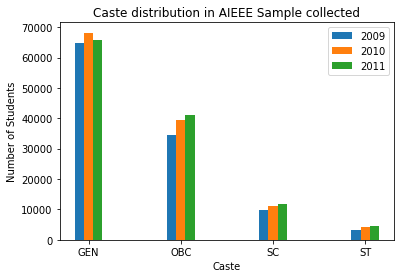

In [ ]:
print(caste_09.groupby('Caste').count())
print(caste_10.groupby('Caste').count())
print(caste_11.groupby('Caste').count())

ranges = ['GEN','OBC','SC','ST']
l1 = caste_09.groupby('Caste').count()
l2 = caste_10.groupby('Caste').count()
l3 = caste_11.groupby('Caste').count()

X_axis = np.arange(len(ranges))

plt.bar(X_axis - 0.1, list(l1.Name),0.1 , label = '2009')
plt.bar(X_axis + 0, list(l2.Name),0.1 ,label = '2010')
plt.bar(X_axis + 0.1, list(l3.Name),0.1 ,label = '2011')

plt.xticks(X_axis, ranges)
plt.xlabel("Caste")
plt.ylabel("Number of Students")
plt.title("Caste distribution in AIEEE Sample collected")
plt.legend()
plt.show()

In [ ]:
# Marks range based on gender => Get corresponding datsets and may be a common function to plot
# Marks range based on caste => Get corresponding datasets and may be a common function to plot

In [ ]:
caste_df = pd.concat([caste_09, caste_10, caste_11], ignore_index=True)
gender_df = pd.concat([gender_09, gender_10, gender_11], ignore_index=True)
marks_df = pd.concat([marks_09, marks_10, marks_11], ignore_index=True)

In [ ]:
print(caste_df.shape)
print(gender_df.shape)
print(marks_df.shape)

print(caste_df.groupby('Caste').count())
print(gender_df.groupby('Gender').count())

(358511, 2)
(717044, 2)
(338398, 2)
         Name
Caste        
GEN    198865
OBC    115048
SC      32782
ST      11816
          Name
Gender        
FEMALE  358522
MALE    358522


In [ ]:
cm_10 = getMarksCaste(ai10, MAX_2010)
cm_11 = getMarksCaste(ai11, MAX_2011)
cm_09 = getMarksCaste(ai09, MAX_2009)

../PreProcessing/preprocess_aieee.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['category'] = df['category'].replace('', np.NaN)


In [ ]:
cm_df = pd.concat([cm_09, cm_10, cm_11], ignore_index=True)

In [ ]:
cm_df.shape

(338389, 3)

### DataSet Generator

In [ ]:
train_mx, train_my, test_mx, test_my, val_mx, val_my = splitMarks(marks_df)

In [ ]:
train_cx, train_cy, test_cx, test_cy, val_cx, val_cy = splitCaste(caste_df)

In [ ]:
train_gx, train_gy, test_gx, test_gy, val_gx, val_gy = splitGender(gender_df)

In [ ]:
train_cmx, train_cmy, train_cmy1, val_cmx, val_cmy, val_cmy1, test_cmx, test_cmy, test_cmy1 = splitCasteMarks(cm_df)

Train: ((234753, 30),(234753,)) Val:((33556, 30),(33556,)) Test: ((67114, 30),(67114,))


In [ ]:
print(f'Train: ({train_cmx.shape},{train_cmy.shape},{train_cmy1.shape}) Val:({val_cmx.shape},{val_cmy.shape},{val_cmy1.shape}) Test: ({test_cmx.shape},{test_cmy.shape},{test_cmy1.shape})')


Train: ((234753, 30),(234753,),(234753, 4)) Val:((33556, 30),(33556,),(33556, 4)) Test: ((67114, 30),(67114,),(67114, 4))


### Model

In [ ]:
import tensorflow as tf
from tensorflow.python.keras.layers.core import Dense, Activation, Dropout
from tensorflow.python.keras.preprocessing import sequence
from tensorflow.python.keras.models import Sequential, Model, load_model
from tensorflow.python.keras.layers import Dense, Embedding
from tensorflow.python.keras.layers import LSTM, Conv1D
from tensorflow.python.keras.layers import Input, Dense, Flatten
from tensorflow.python.keras.callbacks import TensorBoard

In [ ]:
voc = vocab()

In [ ]:
input_ = Input(shape=(30,), name='input')

embed = Embedding(len(voc)+1, len(voc)+1, name='embed')(input_)
# lstm = LSTM(128, return_sequences=True, activation='tanh', name='lstm')(embed)

conv_1 = Conv1D(filters = 256, kernel_size = 7, activation = 'relu')(embed)
dropout = Dropout(0.2, name='dropout_1')(conv_1)

# flat_1 = Flatten()(conv_1)
# output_1 = Dense(2, activation='softmax', name='gender')(flat_1)

# flat_2 = Flatten()(dropout)
# caste = Dense(4, activation='softmax', name='caste')(flat_2)

flat_3 = Flatten()(dropout)
marks = Dense(1, name='marks')(flat_3)

model = tf.keras.models.Model(inputs= input_, outputs=[marks])

model.compile(
    loss={
#         'gender': 'sparse_categorical_crossentropy',
#         'caste': 'categorical_crossentropy',
        'marks': 'mean_squared_error'
    },
    optimizer='adam',
    metrics={
#         'caste':'categorical_accuracy',
        'marks':'mean_squared_error',
    }
)

model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 30)]              0         
_________________________________________________________________
embed (Embedding)            (None, 30, 29)            841       
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 24, 256)           52224     
_________________________________________________________________
dropout_1 (Dropout)          (None, 24, 256)           0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 6144)              0         
_________________________________________________________________
marks (Dense)                (None, 1)                 6145      
Total params: 59,210
Trainable params: 59,210
Non-trainable params: 0
_______________________________________________________

In [ ]:
model.fit(
    {'input':train_cmx[:100]},
    {'marks':train_cmy[:100]},
    validation_data= ({'input':val_cmx},
    {'marks':val_cmy}),
    batch_size=100,
    epochs=10,
)

Epoch 1/10


UnknownError: 2 root error(s) found.
  (0) Unknown:  Failed to get convolution algorithm. This is probably because cuDNN failed to initialize, so try looking to see if a warning log message was printed above.
	 [[node model_3/conv1d_3/conv1d (defined at <ipython-input-45-d253b8b92d2c>:1) ]]
	 [[gradient_tape/model_3/embed/embedding_lookup/Reshape/_24]]
  (1) Unknown:  Failed to get convolution algorithm. This is probably because cuDNN failed to initialize, so try looking to see if a warning log message was printed above.
	 [[node model_3/conv1d_3/conv1d (defined at <ipython-input-45-d253b8b92d2c>:1) ]]
0 successful operations.
0 derived errors ignored. [Op:__inference_train_function_3275]

Function call stack:
train_function -> train_function


In [ ]:
 import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [ ]:
import tensorflow.python.keras
import tensorflow as tf

config = tf.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.9  # 0.6 sometimes works better for folks
keras.backend.tensorflow_backend.set_session(tf.Session(config=config))

AttributeError: module 'tensorflow' has no attribute 'ConfigProto'

In [ ]:
print(tf.__version__)

2.2.0


In [ ]:
physical_devices = tf.config.list_physical_devices('GPU')
# tf.config.experimental.set_memory_growth(physical_devices[0], enable=True)
from tensorflow.python.client import device_lib

def get_available_devices():
    local_device_protos = device_lib.list_local_devices()
    return [x.name for x in local_device_protos if x.device_type == 'GPU' or x.device_type == 'CPU']

In [ ]:
get_available_devices()

['/device:CPU:0', '/device:GPU:0', '/device:GPU:1']

In [ ]:
!whereis cudnn

cudnn: /usr/include/cudnn.h


In [ ]:
!cat /usr/include/cudnn.h | grep CUDNN_MAJOR -A 2

#define CUDNN_MAJOR 7
#define CUDNN_MINOR 4
#define CUDNN_PATCHLEVEL 1
--
#define CUDNN_VERSION (CUDNN_MAJOR * 1000 + CUDNN_MINOR * 100 + CUDNN_PATCHLEVEL)

#include "driver_types.h"
